<a href="https://colab.research.google.com/github/TanLBT/AI_sangthu2/blob/main/Phanloaitraicay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
"""folder = '/content/drive/MyDrive/projectAI/phanloaitraicay'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('quacam'):
    output = 0
  elif file.startswith('quale'):
    output = 1
  elif file.startswith('quana'):
    output = 2
  elif file.startswith('quaduale'):
    output = 3
  elif file.startswith('quathanglong'):
    output = 4
  else:
    continue
  photo = load_img(folder + '/' + file, target_size=(80, 80))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
save('Photos.npy', photos)
save('Labels.npy', labels)"""

In [ ]:
"""!cp Photos.npy '/content/drive/MyDrive/projectAI'
!cp Labels.npy '/content/drive/MyDrive/projectAI'"""

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
photos = np.load('/content/drive/MyDrive/projectAI/Photos.npy')
labels = np.load('/content/drive/MyDrive/projectAI/Labels.npy')

x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.3)

In [ ]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 80, 80, 3)
x_test = x_test.reshape(x_test.shape[0], 80, 80, 3)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 5)
y_test = to_categorical(y_test, 5)

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, LeakyReLU, Dropout
model = Sequential()
#training data to recognize different faces, remember to use LeakyReLU, Dropout, Normalization
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(80, 80, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(5, activation='softmax'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 78, 78, 32)        896       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 78, 78, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 39, 39, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 37, 37, 64)        0         
                                                      

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
training = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 32, epochs=100)

Epoch 1/100
330/330 [==============================] - 9s 18ms/step - loss: 0.5048 - accuracy: 0.7024 - val_loss: 0.3762 - val_accuracy: 0.7472
Epoch 2/100
330/330 [==============================] - 4s 13ms/step - loss: 0.3639 - accuracy: 0.7427 - val_loss: 0.3595 - val_accuracy: 0.7379
Epoch 3/100
330/330 [==============================] - 5s 14ms/step - loss: 0.3557 - accuracy: 0.7492 - val_loss: 0.3601 - val_accuracy: 0.7397
Epoch 4/100
330/330 [==============================] - 5s 14ms/step - loss: 0.5006 - accuracy: 0.7166 - val_loss: 0.3745 - val_accuracy: 0.7390
Epoch 5/100
330/330 [==============================] - 4s 13ms/step - loss: 0.3699 - accuracy: 0.7450 - val_loss: 0.3587 - val_accuracy: 0.7397
Epoch 6/100
330/330 [==============================] - 5s 15ms/step - loss: 0.3560 - accuracy: 0.7466 - val_loss: 0.3558 - val_accuracy: 0.7452
Epoch 7/100
330/330 [==============================] - 5s 14ms/step - loss: 0.3555 - accuracy: 0.7426 - val_loss: 0.3557 - val_accuracy:

In [20]:
#evaluate score
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.35781601071357727
Test accuracy: 0.7398805618286133


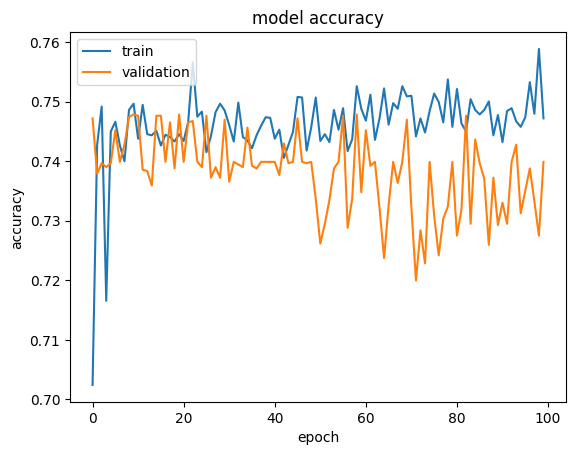

In [21]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [22]:
model.save('model.h5')

In [23]:
!cp model.h5 '/content/drive/MyDrive/projectAI/'